In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import math
from sklearn.metrics import mean_squared_error

In [22]:
#uploading the stock market csv file
from google.colab import files
uploaded=files.upload()

Saving stock_market.csv to stock_market (2).csv


In [23]:
#reading the stock market csv file
df1=pd.read_csv('stock_market.csv')

In [24]:
#We are reversing the data frame here,for better understanding
df2=df1[::-1]
l=[i for i in range(1235)]
df2.insert(8,"Index",l)
df2.set_index("Index",drop=True,inplace=True)

In [25]:
#here open,high,low,last are taken as input and close as output
output=df2[["Close"]]
features = ["Open","High","Low","Last"]

In [29]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
feature_transform = scaler.fit_transform(df2[features])
output_variable=scaler.fit_transform(output)
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df2.index)

In [30]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_variable[:len(train_index)], output_variable[len(train_index): (len(train_index)+len(test_index))]

In [32]:
#For LSTM networks, we require to reshape an input data into 3D Tensor
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = testX.reshape(X_test.shape[0],X_test.shape[1],1)

In [33]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(trainX.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
18/18 [==============================] - 8s 88ms/step - loss: 0.0563 - val_loss: 0.0193
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0149 - val_loss: 0.0249
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 9.3260e-04 - val_loss: 0.0022
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 5.3746e-04 - val_loss: 0.0011
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 3.9443e-04 - val_loss: 6.5969e-04
Epoch 7/100
18/18 [==============================] - 0s 14ms/step - loss: 3.2805e-04 - val_loss: 5.8314e-04
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 2.7673e-04 - val_loss: 5.3579e-04
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 2.2932e-04 - val_loss: 4.1728e-04
Epoch 10/100
18/18 [==============================] - 0s 13m

In [35]:
train_pred= model.predict(X_train)
test_pred=model.predict(X_test)

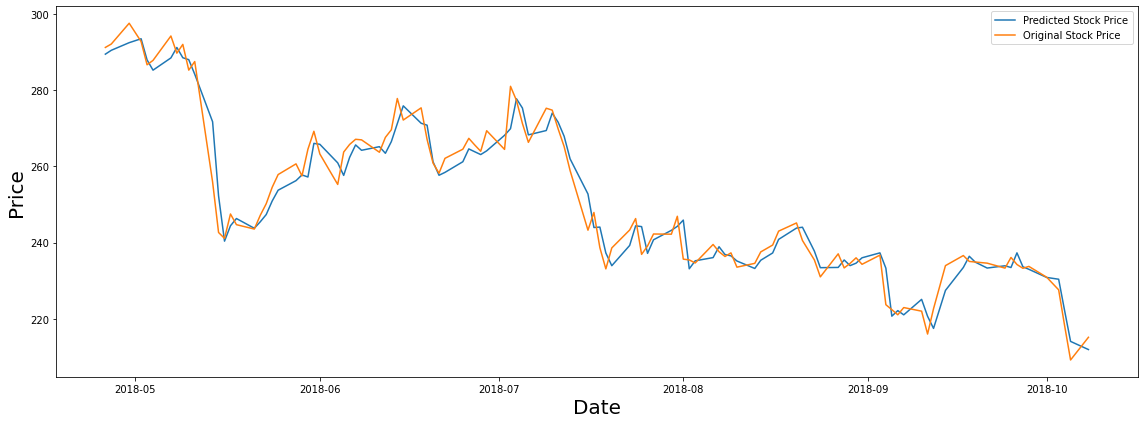

In [36]:
#plot of original vs predicted values
df2["Date"]=pd.to_datetime(df2["Date"])
f1={"family":'sans-serif',"color":"k",'size':20}
plt.figure(figsize=(16,6))
plt.plot(df2["Date"][-112:],scaler.inverse_transform(test_pred),label="Predicted Stock Price")
plt.plot(df2["Date"][-112:],scaler.inverse_transform(y_test),label="Original Stock Price")
plt.xlabel("Date",fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.legend()
plt.tight_layout()

In [37]:
l1=train_pred.tolist()
l2=test_pred.tolist()
l1.extend(l2)
l3=np.array(l1)
predicted=scaler.inverse_transform(l3)
df2["Date"]=pd.to_datetime(df2["Date"])

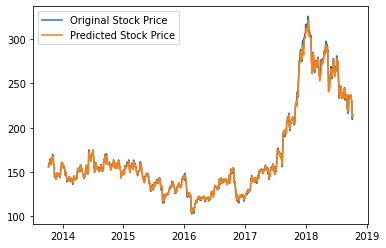

In [38]:
plt.plot(df2["Date"],df2["Close"],label="Original Stock Price")
plt.plot(df2["Date"],predicted,label="Predicted Stock Price")
plt.legend()

In [39]:
df2.insert(8,"Close Predicted",predicted)
df2.drop("Total Trade Quantity",inplace=True,axis=1)
df2.drop("Turnover (Lacs)",inplace=True,axis=1)
df2.to_csv("Newly_predicted_values.csv")

In [40]:
df2

,Date,Open,High,Low,Last,Close,Close Predicted
Index,,,,,,,
0,2013-10-08,157.00,157.80,155.20,155.80,155.80,156.008574
1,2013-10-09,155.70,158.20,154.15,155.30,155.55,155.346304
2,2013-10-10,156.00,160.80,155.85,160.30,160.15,156.937040
3,2013-10-11,161.15,163.45,159.00,159.80,160.05,160.502661
4,2013-10-14,160.85,161.45,157.70,159.30,159.45,159.486304
...,...,...,...,...,...,...,...
1230,2018-10-01,234.55,234.60,221.05,230.30,230.90,230.848083
1231,2018-10-03,230.00,237.50,225.75,226.45,227.60,230.383245
1232,2018-10-04,223.50,227.80,216.15,217.25,218.20,222.138718
